In [1]:
import os
from pathlib import Path

NOTEBOOK_PATH: Path = Path(os.path.abspath(''))

DATA_PATH: Path = NOTEBOOK_PATH.parent.joinpath('data')

PATH_FOR_RESULT: Path = NOTEBOOK_PATH.joinpath('RESULT')

if not PATH_FOR_RESULT.exists():
    PATH_FOR_RESULT.mkdir()

print(f'当前运行目录：{NOTEBOOK_PATH}')
print(f'当前数据目录：{DATA_PATH}')

当前运行目录：D:\Development\Python\InvestmentWorkshop\notebook
当前数据目录：D:\Development\Python\InvestmentWorkshop\data


# 缠论 A-03

A 系列仅使用 pandas 读取数据，不用于计算。

A-03 使用 object。

## 准备

### 引用模块

In [2]:
from typing import List

import pandas as pd

from utility import (
    get_available_datafile_name,
    load_csv_as_dataframe,
    get_saved_filename,
    save_dataframe_to_csv
)
from InvestmentWorkshop.indicator import (
    pbx,
    ChanTheory
)

Load succeed.


### 设置 pandas

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

### 可用数据

In [4]:
available_datafile = get_available_datafile_name(DATA_PATH, 'Minute')
for symbol, period in available_datafile:
    print(f'symbol: {symbol:>12}, period: {period}')

symbol:    DCE.c2201, period: Minute
symbol:    DCE.i2201, period: Minute
symbol:  SHFE.ag2106, period: Minute
symbol:  SHFE.al2111, period: Minute
symbol:  SHFE.al2112, period: Minute
symbol:  SHFE.hc2110, period: Minute
symbol:  SHFE.hc2201, period: Minute
symbol:  SHFE.hc2202, period: Minute
symbol:  SHFE.rb2201, period: Minute


### 声明数据

使用分钟数据

In [5]:
symbol: str = 'SHFE.al2112'
period: str = 'Minute'
dt_start: str = '2021-10-15 13:30:00'
dt_end: str = '2021-10-19 00:59:00'

### 加载数据

In [6]:
origin_data: pd.DataFrame = load_csv_as_dataframe(DATA_PATH.joinpath(f'{symbol}_{period}.csv'))
df_ohlc: pd.DataFrame = origin_data.loc[dt_start:dt_end, ['open', 'high', 'low', 'close']]

df_ohlc.info()
print('-' * 100)
df_ohlc.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 795 entries, 2021-10-15 13:30:00 to 2021-10-19 00:59:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    795 non-null    float64
 1   high    795 non-null    float64
 2   low     795 non-null    float64
 3   close   795 non-null    float64
dtypes: float64(4)
memory usage: 31.1 KB
----------------------------------------------------------------------------------------------------


,open,high,low,close
datetime,,,,
2021-10-15 13:30:00,23900.0,23900.0,23840.0,23845.0
2021-10-15 13:31:00,23845.0,23895.0,23845.0,23895.0
2021-10-15 13:32:00,23895.0,23895.0,23855.0,23875.0
2021-10-15 13:33:00,23875.0,23895.0,23840.0,23845.0
2021-10-15 13:34:00,23845.0,23855.0,23830.0,23830.0


## 结果

### 计算

In [7]:
count: int = 100
chan_theory = ChanTheory(debug=True)
chan_theory.run_with_dataframe(df_ohlc, count=count)


【第   0 /  99 轮】（按普通K线编号）

  ○ 生成K线：
    当前合并K线 起始普通K线idx=0，周期=1，高点=23900.0，低点=23840.0。


【第   1 /  99 轮】（按普通K线编号）

  ○ 合并K线：
    当前合并K线 起始普通K线idx=0，周期=2，高点=23900.0，低点=23840.0。


【第   2 /  99 轮】（按普通K线编号）

  ○ 合并K线：
    当前合并K线 起始普通K线idx=0，周期=3，高点=23900.0，低点=23840.0。


【第   3 /  99 轮】（按普通K线编号）

  ○ 合并K线：
    当前合并K线 起始普通K线idx=0，周期=4，高点=23900.0，低点=23840.0。


【第   4 /  99 轮】（按普通K线编号）

  ○ 生成K线：
    当前合并K线 起始普通K线idx=1，周期=1，高点=23855.0，低点=23830.0。


【第   5 /  99 轮】（按普通K线编号）

  ○ 合并K线：
    当前合并K线 起始普通K线idx=1，周期=2，高点=23855.0，低点=23830.0。


【第   6 /  99 轮】（按普通K线编号）

  ○ 生成K线：
    当前合并K线 起始普通K线idx=2，周期=1，高点=23900.0，低点=23875.0。


  生成分型：
    第 1 个分型，pattern = 底分型，function = 中继，普通K线 idx = 5。

【第   7 /  99 轮】（按普通K线编号）

  ○ 生成K线：
    当前合并K线 起始普通K线idx=3，周期=1，高点=23915.0，低点=23880.0。


【第   8 /  99 轮】（按普通K线编号）

  ○ 生成K线：
    当前合并K线 起始普通K线idx=4，周期=1，高点=23890.0，低点=23845.0。


【第   9 /  99 轮】（按普通K线编号）

  ○ 合并K线：
    当前合并K线 起始普通K线idx=4，周期=2，高点=23885.0，低点=23860.0。


【第  10 /  99 轮】（按普通K线编号）

  ○ 生成K线：
    当前合并K线

### 结果

#### 合并K线

In [8]:
length: int = len(chan_theory.merged_candles)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_theory.merged_candles[i]}')

  0, MergedCandle (idx=0, period=4, first_ordinary_idx=0, last_ordinary_idx=3, price_high=23900.0, price_low=23840.0)
  1, MergedCandle (idx=1, period=2, first_ordinary_idx=4, last_ordinary_idx=5, price_high=23855.0, price_low=23830.0)
  2, MergedCandle (idx=2, period=1, first_ordinary_idx=6, last_ordinary_idx=6, price_high=23900.0, price_low=23875.0)
  3, MergedCandle (idx=3, period=1, first_ordinary_idx=7, last_ordinary_idx=7, price_high=23915.0, price_low=23880.0)
  4, MergedCandle (idx=4, period=2, first_ordinary_idx=8, last_ordinary_idx=9, price_high=23885.0, price_low=23860.0)
  5, MergedCandle (idx=5, period=1, first_ordinary_idx=10, last_ordinary_idx=10, price_high=23920.0, price_low=23865.0)
  6, MergedCandle (idx=6, period=1, first_ordinary_idx=11, last_ordinary_idx=11, price_high=23955.0, price_low=23910.0)
  7, MergedCandle (idx=7, period=1, first_ordinary_idx=12, last_ordinary_idx=12, price_high=23985.0, price_low=23945.0)
  8, MergedCandle (idx=8, period=2, first_ordinary

#### 分型

In [9]:
length: int = len(chan_theory.fractals)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_theory.fractals[i]}')

  0, Fractal (idx=0, pattern=底分型, function=中继, ordinary_idx=5, extreme_price=23830.0)
  1, Fractal (idx=1, pattern=顶分型, function=中继, ordinary_idx=12, extreme_price=23985.0)
  2, Fractal (idx=2, pattern=顶分型, function=中继, ordinary_idx=18, extreme_price=23940.0)
  3, Fractal (idx=3, pattern=底分型, function=中继, ordinary_idx=25, extreme_price=23875.0)
  4, Fractal (idx=4, pattern=顶分型, function=中继, ordinary_idx=30, extreme_price=23945.0)
  5, Fractal (idx=5, pattern=顶分型, function=转折, ordinary_idx=37, extreme_price=24015.0)
  6, Fractal (idx=6, pattern=底分型, function=中继, ordinary_idx=42, extreme_price=23915.0)
  7, Fractal (idx=7, pattern=底分型, function=转折, ordinary_idx=54, extreme_price=23895.0)
  8, Fractal (idx=8, pattern=顶分型, function=中继, ordinary_idx=71, extreme_price=24110.0)
  9, Fractal (idx=9, pattern=顶分型, function=中继, ordinary_idx=79, extreme_price=24315.0)
 10, Fractal (idx=10, pattern=顶分型, function=转折, ordinary_idx=88, extreme_price=24450.0)
 11, Fractal (idx=11, pattern=底分型, function

#### 笔

In [10]:
length: int = len(chan_theory.strokes)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_theory.strokes[i]}')

 0, Stroke (idx=0, trend=上升, left_ordinary_idx=5, right_ordinary_idx=12)
 1, Stroke (idx=1, trend=下降, left_ordinary_idx=18, right_ordinary_idx=25)
 2, Stroke (idx=2, trend=上升, left_ordinary_idx=25, right_ordinary_idx=37)
 3, Stroke (idx=3, trend=下降, left_ordinary_idx=37, right_ordinary_idx=54)
 4, Stroke (idx=4, trend=上升, left_ordinary_idx=54, right_ordinary_idx=88)
 5, Stroke (idx=5, trend=下降, left_ordinary_idx=88, right_ordinary_idx=98)


#### 线段

In [11]:
length: int = len(chan_theory.segments)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_theory.segments[i]}')

### 绘图

Plot done.


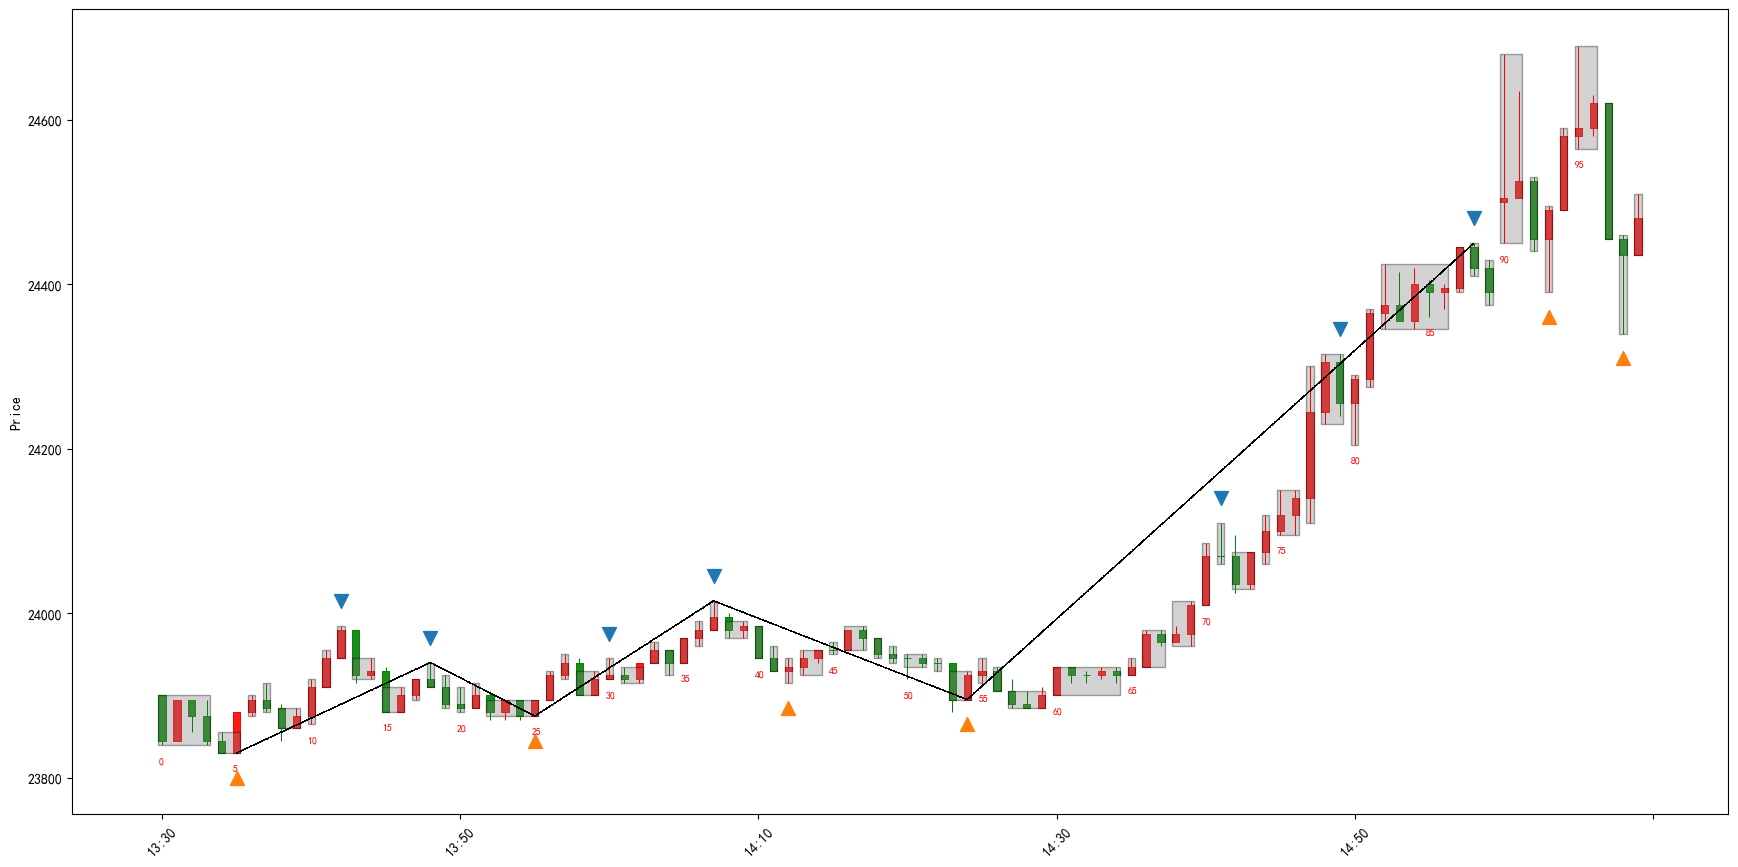

In [12]:
chan_theory.plot(
    df_ohlc,
    count,
    show_ordinary_idx=True,
    show_merged_idx=False,
    show_all_merged=True,
    hatch_merged=True,
    fractal_marker_size=100,
    fractal_marker_offset=30
)